In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'bmh' ) 

import pickle
import pandas 
import numpy as np 

from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.cross_validation import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

In [2]:
with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


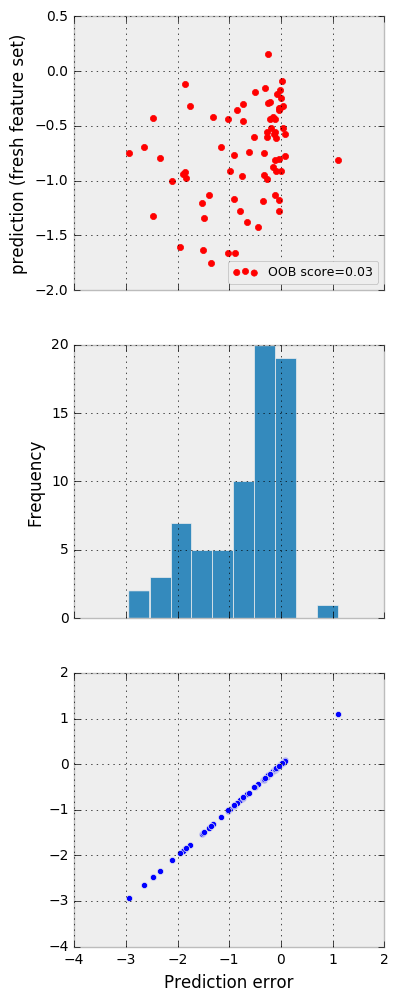

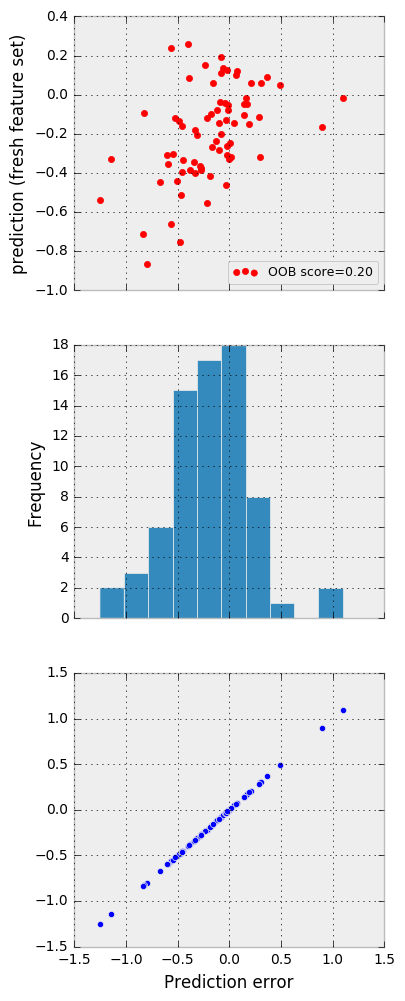

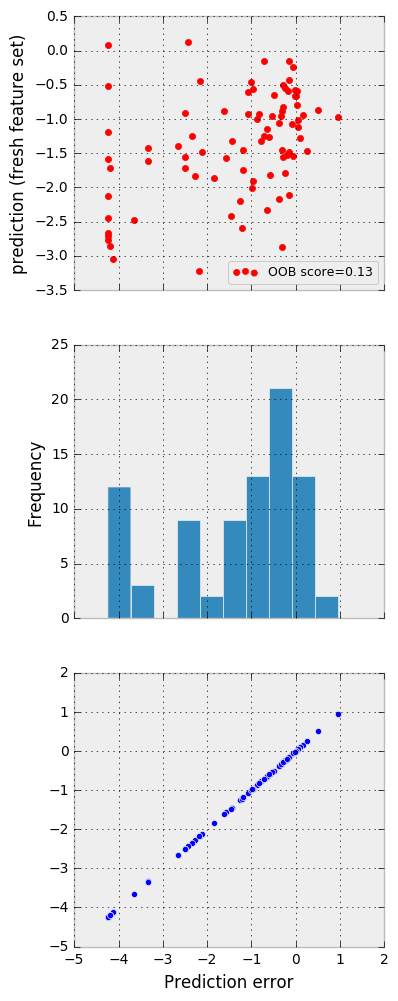

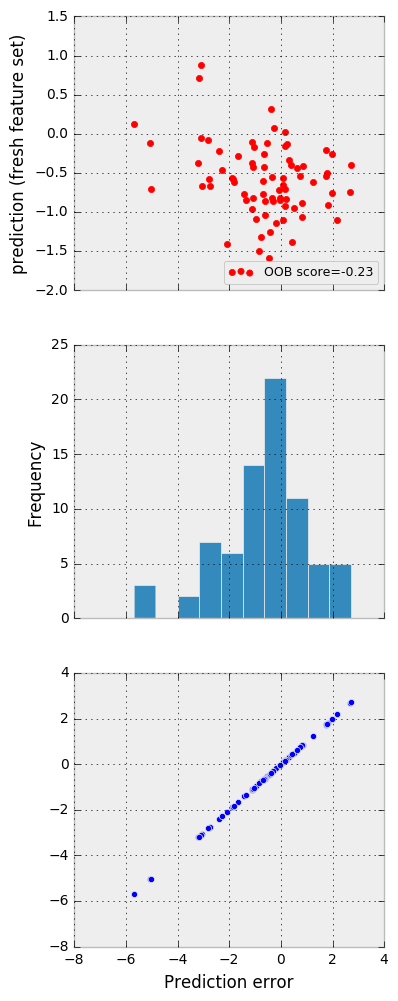

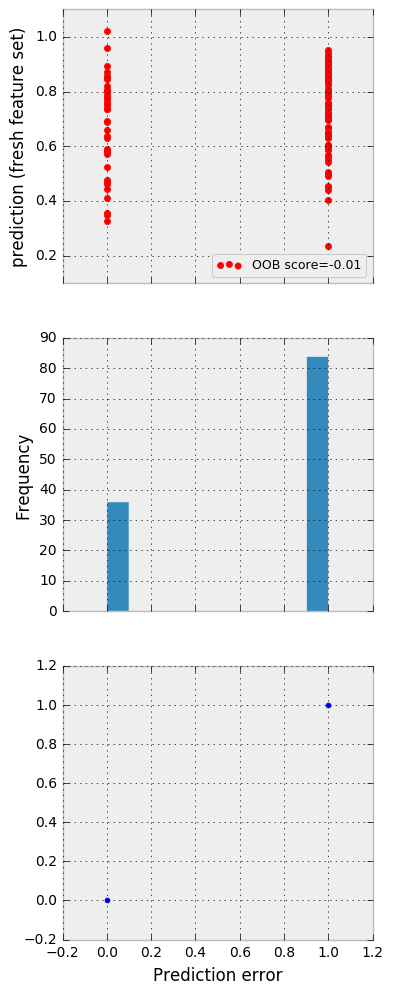

In [3]:
for i, ( name, target, X, y, support, corr_to_target ) in enumerate( combos ):
    if name == 'fresh':
        
        # fit the model 
        skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
        net = ElasticNetCV( cv=skf, max_iter=1e9, selection='random' ) 
        bag = BaggingRegressor( net, n_estimators=99, n_jobs=-1, oob_score=True ) 
        bag.fit( X, y ) 

        # plot 
        fig, ax = plt.subplots( nrows=1, ncols=3, figsize=(12, 4), sharex=True ) 
        ax[0].scatter( y, bag.oob_prediction_, color='red', alpha=1 )
        ax[0].legend( [ 'OOB score={0:.2f}'.format( bag.oob_score_ ) ], loc='lower right', fontsize='9' ) 
        ax[0].set_ylabel( 'prediction ({} feature set)'.format( name ) ) 
        
        ax[1].hist( y ) 
        ax[1].set_ylabel( 'Frequency' ) 
        
        ax[2].scatter( y, y ) 
        ax[2].set_ylabel( 'Prediction error' )
        ax[2].set_ylabel( 'Measured value' )
        
        fig.show()